[View in Colaboratory](https://colab.research.google.com/github/kintarou/django-starter/blob/master/baysian_filter.ipynb)

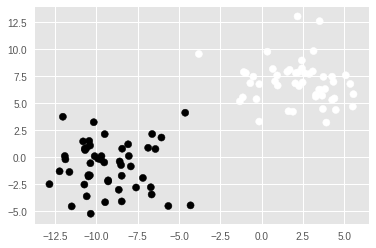

In [5]:
from sklearn import datasets
X,y=datasets.make_blobs(100,2,centers=2,random_state=3600,cluster_std=2)
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
plt.scatter(X[:,0],X[:,1],c=y,s=50)

In [7]:
import numpy as np
from sklearn import model_selection as ms
X=X.astype(np.float32)
X_train,X_test,y_train,y_test=ms.train_test_split(X,y,test_size=0.1)
import cv2
model_norm=cv2.ml.NormalBayesClassifier_create()
model_norm.train(X_train,cv2.ml.ROW_SAMPLE,y_train)

True

In [8]:
_,y_pred=model_norm.predict(X_test)
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)

1.0

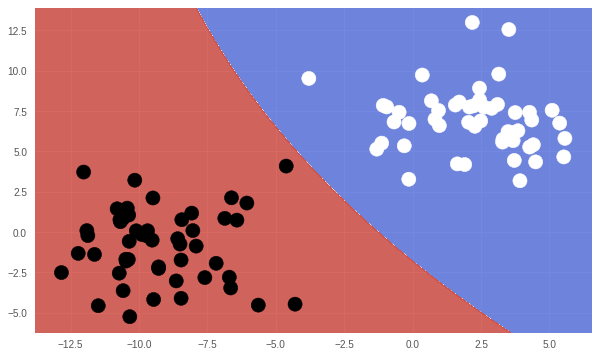

In [10]:
def plot_decision_boundary(model, X_test, y_test):
    # create a mesh to plot in
    h = 0.02  # step size in mesh
    x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
    y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    X_hypo = np.column_stack((xx.ravel().astype(np.float32),
                              yy.ravel().astype(np.float32)))
    ret = model.predict(X_hypo)
    if isinstance(ret, tuple):
        zz = ret[1]
    else:
        zz = ret
    zz = zz.reshape(xx.shape)
    
    plt.contourf(xx, yy, zz, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=200)
    
plt.figure(figsize=(10, 6))
plot_decision_boundary(model_norm, X, y)

In [12]:
from math import factorial
x=factorial(9)
print(x*70)

25401600


In [0]:
from math import floor, sqrt
try: 
    long
except NameError: 
    long = int
def prime_factor(n):
    step = lambda x: 1 + (x<<2) - ((x>>1)<<1)
    maxq = long(floor(sqrt(n)))
    d = 1
    q = n % 2 == 0 and 2 or 3 
    while q <= maxq and n % q != 0:
        q = step(d)
        d += 1
    return q <= maxq and [q] + prime_factor(n//q) or [n]

In [14]:
prime_factor(25401600)

[2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 5, 5, 7, 7]